In [19]:
import sys


In [20]:
import matplotlib
import numpy as np
import pandas as pd
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('e1.txt',sep=':',error_bad_lines=False, warn_bad_lines=False)

In [22]:
df = df. dropna()

In [23]:
df["person"] = df["person"].str.lower()
df["line"] = df["line"].str.lower()

In [24]:
df[150:200]

,person,line
200,ros,oh? i hear he’s more than earned it. i hear h...
201,tyrion,clever girl.
202,ros,"we’ve been expecting you, lord tyrion."
203,tyrion,have you?
204,tyrion,the gods gave me one blessing.
206,jaime,don’t get up.
207,ros,m’lord.
208,tyrion,should i explain to you the meaning of a clos...
209,jaime,"you’ve much to teach me, no doubt. but our si..."
210,tyrion,"she has odd cravings, our sister."


# Here we replace slashes with a space

In [25]:
df["person"]= df["person"].str.replace("/", " ", case = False) 

In [26]:
df

,person,line
0,waymar royce,what d’you expect? they’re savages. one lot s...
1,will,i’ve never seen wildlings do a thing like thi...
2,waymar royce,how close did you get?
3,will,close as any man would.
4,gared,we should head back to the wall.
...,...,...
416,cersei,he saw us!
417,jaime,i heard you the first time. (to bran) quite t...
418,bran,ten
420,jaime,ten.


# Now we delete second name for people
### We are using regex

In [37]:
df['person'] = df.person.str.replace(r'^(\s*(?:\S+\s+){1})\S+',r'\1')

In [38]:
df

,person,line
0,waymar,what d’you expect? they’re savages. one lot s...
1,will,i’ve never seen wildlings do a thing like thi...
2,waymar,how close did you get?
3,will,close as any man would.
4,gared,we should head back to the wall.
...,...,...
416,cersei,he saw us!
417,jaime,i heard you the first time. quite the little...
418,bran,ten
420,jaime,ten.


# Here we get rid of brackets and everything inside of them
### Using regex

In [39]:
df['line'] = df['line'].str.replace(r"\(.*\)","")

In [40]:
df['person'] = df['person'].str.replace(r"\(.*\)","")

df

,person,line
0,waymar,what d’you expect? they’re savages. one lot s...
1,will,i’ve never seen wildlings do a thing like thi...
2,waymar,how close did you get?
3,will,close as any man would.
4,gared,we should head back to the wall.
...,...,...
416,cersei,he saw us!
417,jaime,i heard you the first time. quite the little...
418,bran,ten
420,jaime,ten.


In [54]:
df.person = df.person.str.rstrip()

In [55]:
df.columns = df.columns.str.lstrip()

In [56]:
df = df[df.person != "the"]
df = df[df.person != "a"]

In [57]:
df.person.unique()

array(['waymar', 'will', 'gared', 'royce', 'jon', 'septa', 'sansa', 'ned',
       'robb', 'cassel', 'catelyn', 'bran', 'theon', 'cersei', 'jaime',
       'maester', 'luwin', 'arya', 'robert', 'tyrion', 'ros', 'viserys',
       'daenerys', 'maid', 'illyrio', 'benjen', 'jorah', 'khal'],
      dtype=object)

In [58]:
df['line'] = df['line'].str.replace(".","")
df['line'] = df['line'].str.replace(",","")

In [59]:
df

,person,line
0,waymar,what d’you expect? they’re savages one lot st...
1,will,i’ve never seen wildlings do a thing like thi...
2,waymar,how close did you get?
3,will,close as any man would
4,gared,we should head back to the wall
...,...,...
416,cersei,he saw us!
417,jaime,i heard you the first time quite the little ...
418,bran,ten
420,jaime,ten


In [60]:
df['exc'] = df['line'].map(lambda x: x.count("!"))

In [62]:
df['ques'] = df['line'].map(lambda x: x.count("?"))

In [63]:
df

,person,line,exc,ques
0,waymar,what d’you expect? they’re savages one lot st...,0,1
1,will,i’ve never seen wildlings do a thing like thi...,0,0
2,waymar,how close did you get?,0,1
3,will,close as any man would,0,0
4,gared,we should head back to the wall,0,0
...,...,...,...,...
416,cersei,he saw us!,1,0
417,jaime,i heard you the first time quite the little ...,0,2
418,bran,ten,0,0
420,jaime,ten,0,0


In [68]:
df1 = df.groupby("person")["exc"].sum().reset_index()
df1

,person,exc
0,arya,1
1,benjen,0
2,bran,6
3,cassel,0
4,catelyn,1
5,cersei,1
6,daenerys,0
7,gared,0
8,illyrio,0
9,jaime,0


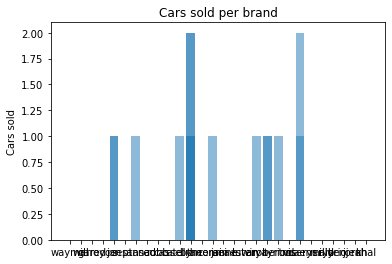

In [70]:
plt.bar(df.person, df.exc, align='center', alpha=0.5)
plt.ylabel('No. Exclamation Points')
plt.title('No. of exclamation points per person')

plt.show()